In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
# Loading the dataset
df = pd.read_csv('diabetes.csv')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'familyhistory'})

In [6]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing familyhistory: {0}".format(len(df.loc[df['familyhistory'] == 0])))
print("number of rows missing Age: {0}".format(len(df.loc[df['Age'] == 0])))

total number of rows : 768
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing familyhistory: 0
number of rows missing Age: 0


In [7]:
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,familyhistory,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Model Building
from sklearn.model_selection import train_test_split
X = df_copy.drop(columns='Outcome')
y = df_copy['Outcome']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_estimators=500).fit(X_train_scaled, y_train)

In [12]:
print(f'Random Forest Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Random Forest Testing Score: {clf.score(X_test_scaled, y_test)}')

Random Forest Training Score: 1.0
Random Forest Testing Score: 0.8177083333333334


In [13]:
# Fit a model, and then print a classification report
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=["low_risk","high_risk"]))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    low_risk       0.84      0.89      0.86       123
   high_risk       0.77      0.70      0.73        69

    accuracy                           0.82       192
   macro avg       0.81      0.79      0.80       192
weighted avg       0.82      0.82      0.82       192

Training Score: 1.0
Testing Score: 0.8177083333333334


In [14]:
# Creating a pickle file for the classifier
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(clf, open(filename, 'wb'))

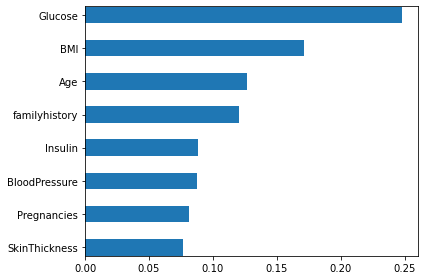

In [15]:
feature_importances = clf.feature_importances_
features = sorted(zip(X_test.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

plt.margins(y=0.001)

ax.barh(y=cols, width=width, height=0.5)
fig.tight_layout()
plt.savefig("features.png")
plt.show()

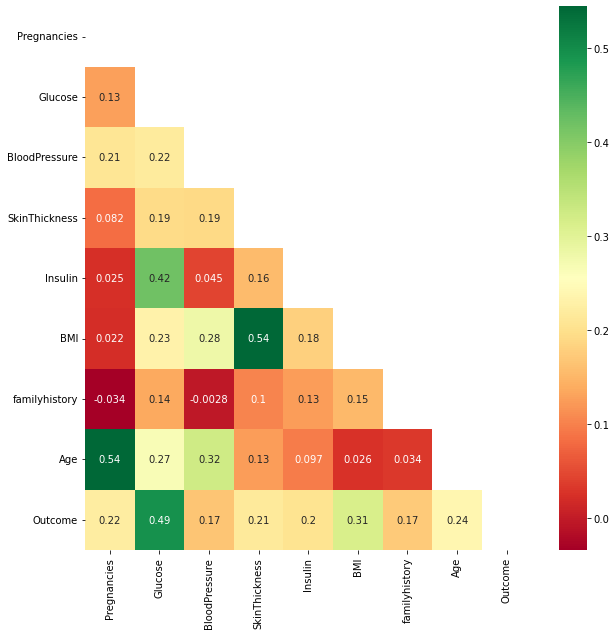

In [16]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df_copy.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
#plot heat map
g=sns.heatmap(df_copy[top_corr_features].corr(),annot=True,cmap="RdYlGn", mask=mask)
fig.tight_layout()
plt.savefig("correlation.png")
plt.show()

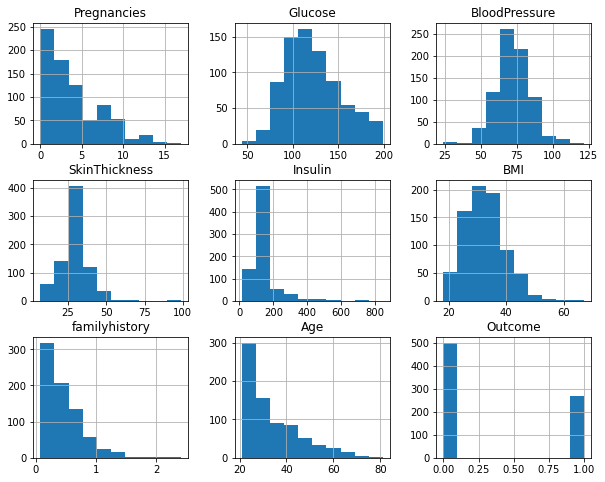

In [17]:
df_copy.hist(figsize=(10,8))
fig.tight_layout()
plt.savefig("distribution.png")
plt.show()

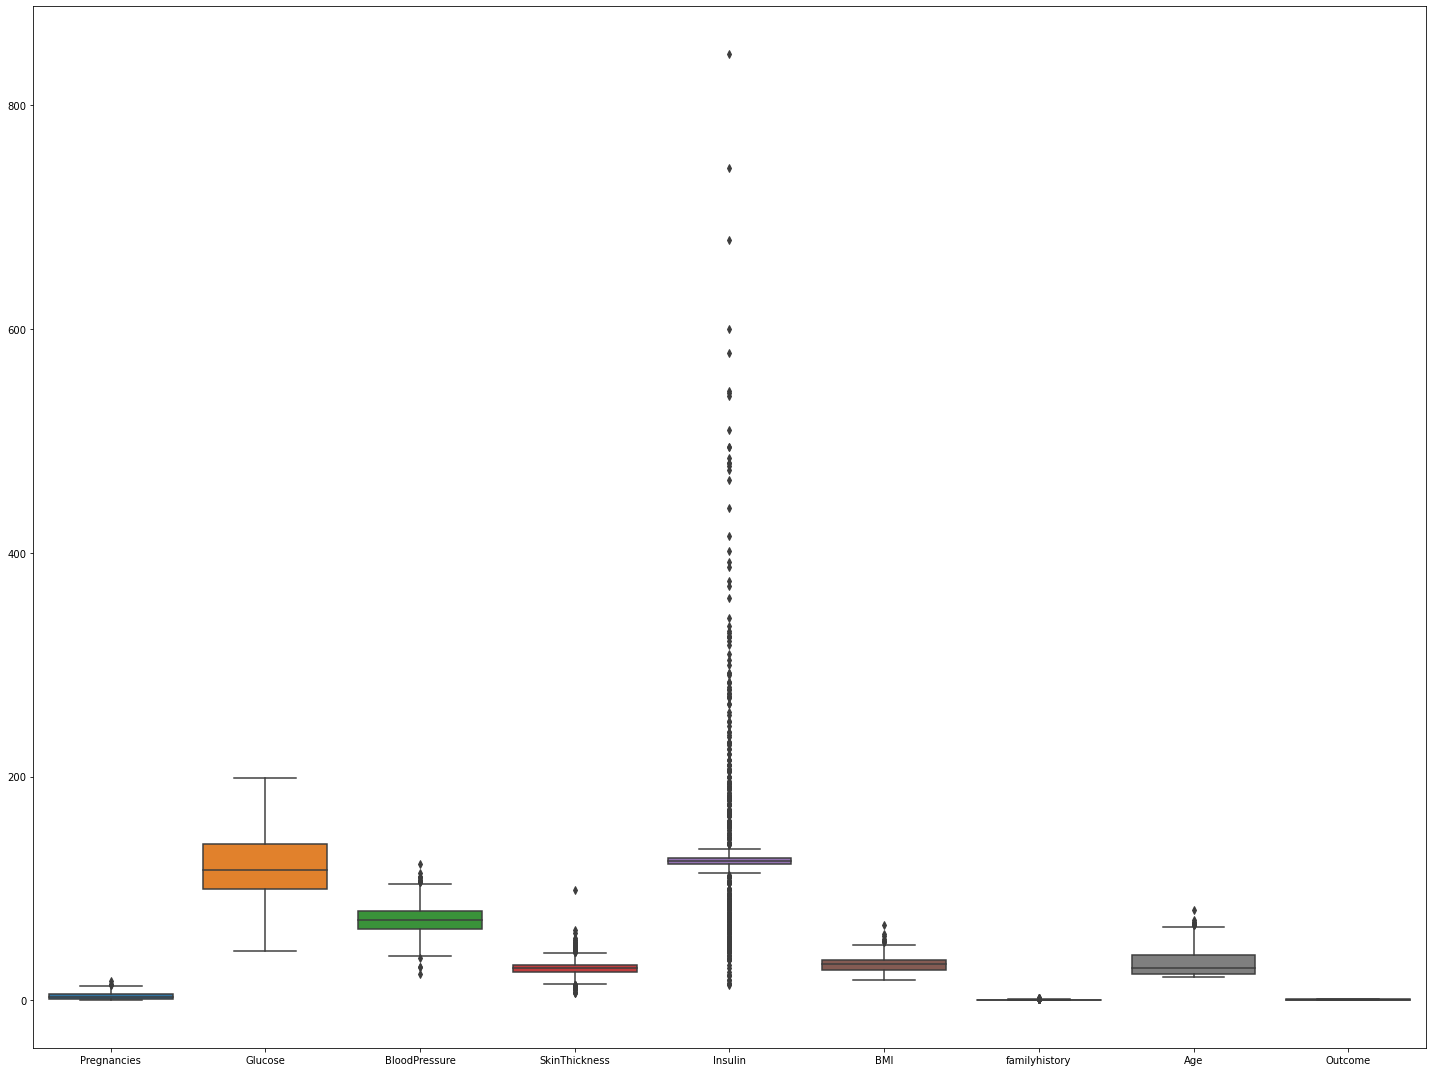

In [18]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=df_copy);
fig.tight_layout()
plt.savefig("outliers.png")
plt.show()

In [19]:
df_scaled = StandardScaler().fit_transform(df_copy)
df_scaled

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  2.0158134 , -0.69530596, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [20]:
df_scaled.shape

(768, 9)

In [21]:
df_scaled_df = pd.DataFrame(df_scaled)
df_scaled_df.head()

,0,1,2,3,4,5,6,7,8
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496,1.365896


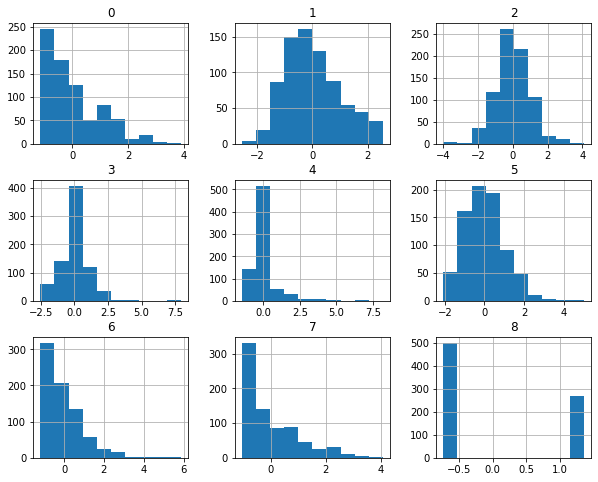

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
scaled_pca = pca.fit_transform(df_scaled)

In [24]:
df_pca = pd.DataFrame(data = scaled_pca)
df_pca.head()

,0,1,2,3,4,5,6
0,1.898069,-0.649162,0.319979,0.636566,0.529739,-0.626567,0.667715
1,-1.704944,0.095397,-0.227434,-0.093522,0.188265,0.428828,0.356478
2,1.059376,-0.669268,1.941193,0.472333,0.610127,-1.205594,0.640480
3,-2.281603,0.216062,-0.272205,-0.568943,-0.035082,-0.253182,-0.185080
4,1.396639,3.624300,2.018026,4.710945,0.971517,0.121820,0.388562


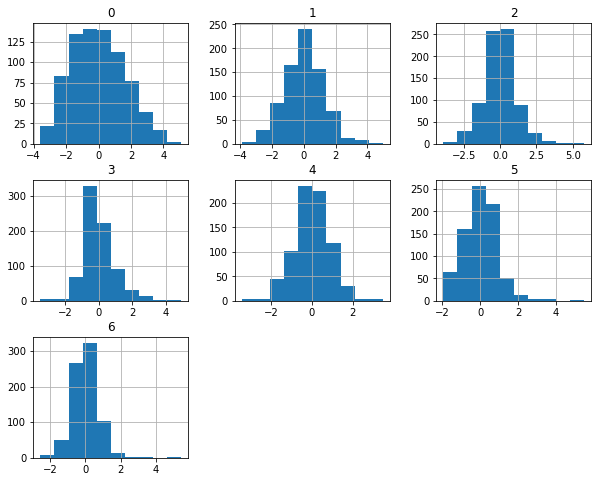

In [56]:
df_pca.hist(figsize=(10,8))
fig.tight_layout()
plt.savefig("distributionscaledd.png")
plt.show()

In [25]:
pca.explained_variance_ratio_

array([0.29101077, 0.16644605, 0.13033872, 0.10204294, 0.08548146,
       0.08331198, 0.05555137])

In [26]:
scaled_pca.shape

(768, 7)

In [27]:
pca = PCA(n_components=3)

X_scaled_pca = pca.fit_transform(scaled_pca)

In [28]:
df_scaled_pca = pd.DataFrame(
    data=X_scaled_pca, columns=["pc1", "pc2", "pc3"]
)
df_scaled_pca.head()

,pc1,pc2,pc3
0,1.898069,-0.649162,0.319979
1,-1.704944,0.095397,-0.227434
2,1.059376,-0.669268,1.941193
3,-2.281603,0.216062,-0.272205
4,1.396639,3.624300,2.018026


In [29]:
pca.explained_variance_ratio_

array([0.31832869, 0.18207076, 0.14257394])

In [30]:
# Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

# Run t-SNE
tsne = TSNE(learning_rate = 250)
tsne_features = tsne.fit_transform(df_scaled_pca)
tsne_features.shape

C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(768, 2)

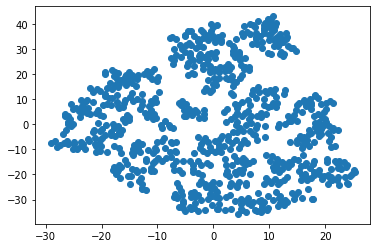

In [31]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])

fig.tight_layout()
plt.savefig("tsne_scatter.png")
plt.show()

In [32]:
# Create an elbow plot to identify the best number of clusters
inertia = []
k = list(range(1, 7))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_scaled_pca)
    inertia.append(km.inertia_)\
    
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,4062.842734
1,2,2678.137746
2,3,2068.619691
3,4,1722.539820
4,5,1512.494598
5,6,1344.017363


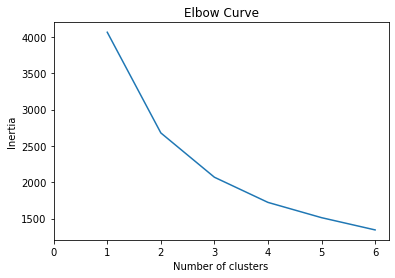

In [33]:
# Plot
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(7)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
fig.tight_layout()
plt.savefig("elbow_curve.png")
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0).fit(X_train, y_train)
print(f"Logistic Regression Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Logistic Regression Testing Data Score: {classifier.score(X_test, y_test)}")

Logistic Regression Training Data Score: 0.7725694444444444
Logistic Regression Testing Data Score: 0.78125


C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
predictions = classifier.predict(X_test)
print(f"First 10 predictions:   {predictions[:10]}")
print(f"First 10 actual labels: {y_test[:10].tolist()}")

First 10 predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [36]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[108,  15],
       [ 27,  42]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["low_risk","high_risk"]))

              precision    recall  f1-score   support

    low_risk       0.80      0.88      0.84       123
   high_risk       0.74      0.61      0.67        69

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



In [38]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.78125


In [39]:
clf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
print(f'Random Forest Classifier Training Score: {clf.score(X_train, y_train)}')
print(f'Random Forest Classifier Testing Score: {clf.score(X_test, y_test)}')

Random Forest Classifier Training Score: 1.0
Random Forest Classifier Testing Score: 0.8072916666666666


In [40]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["low_risk","high_risk"]))

              precision    recall  f1-score   support

    low_risk       0.83      0.88      0.85       123
   high_risk       0.76      0.68      0.72        69

    accuracy                           0.81       192
   macro avg       0.79      0.78      0.79       192
weighted avg       0.80      0.81      0.80       192



In [41]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.8072916666666666


In [42]:

df_copy.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,familyhistory,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.686567,164.701493,35.383582,0.550500,37.067164


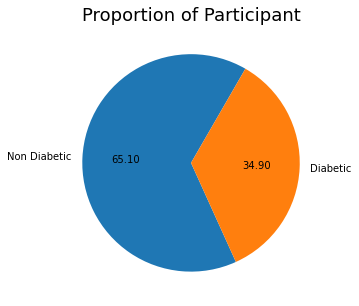

In [43]:
plt.figure(figsize=[5,5])
plt.pie(df_copy['Outcome'].value_counts(),labels = ['Non Diabetic','Diabetic'],autopct = '%.2f',
        startangle = 60)
plt.title('Proportion of Participant',fontsize = 18)
fig.tight_layout()
plt.savefig("outcome proportion.png")
plt.show()



In [44]:
from sklearn.utils import resample
df_major = df_copy[(df_copy['Outcome']==0)]
df_minor = df_copy[(df_copy['Outcome']==1)]
upsample = resample(df_minor,
                    replace = True,
                    n_samples = 500,
                    random_state= 42)
df_copy = pd.concat([upsample, df_major])

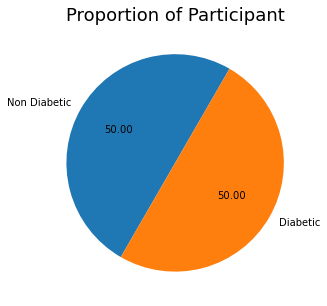

Outcome
0    500
1    500
dtype: int64

In [45]:
plt.figure(figsize=[5,5])
plt.pie(df_copy['Outcome'].value_counts(),labels = ['Non Diabetic','Diabetic'],autopct = '%.2f',
        startangle = 60)
plt.title('Proportion of Participant',fontsize = 18)
plt.show()

df_copy.groupby('Outcome').size()


In [46]:
x = df_copy.drop(['Outcome'],axis = 1)
y = df_copy['Outcome']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, 
                                                 random_state = 0)

In [48]:
from collections import Counter
print(Counter(y_train))

Counter({1: 402, 0: 398})


In [49]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:

def initiate_clf(modeling):
  
    y_pred = modeling.fit(x_train, y_train).predict(x_test)
    Accuracy = accuracy_score(y_test, y_pred)
    Roc = roc_auc_score(y_test, modeling.predict_proba(x_test)[:,1])
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    metrics = [Accuracy, Roc, f1,recall, precision]
    return metrics

modeling = [LogisticRegression(random_state = 0),
      RandomForestClassifier(random_state = 0)]

metric_list = []
for clf in modeling:
    initiate_clf(clf)
    metrics = initiate_clf(clf)
    metric_list.append(metrics)
metric_list

[[0.8,
  0.8681472589035615,
  0.7938144329896908,
  0.7857142857142857,
  0.8020833333333334],
 [0.9,
  0.9709883953581433,
  0.9047619047619048,
  0.9693877551020408,
  0.8482142857142857]]

In [51]:
model  = pd.DataFrame([[metric_list[0][0],metric_list[0][1],metric_list[0][2],metric_list[0][3],metric_list[0][4]],
                      [metric_list[1][0],metric_list[1][1],metric_list[1][2],metric_list[1][3],metric_list[1][4]]],
                      columns = ['Accuracy','ROC-AUC','F1-Score','Recall','Precision'],
                      index = ['LogisticRegression','RandomForest'])
model

,Accuracy,ROC-AUC,F1-Score,Recall,Precision
LogisticRegression,0.8,0.868147,0.793814,0.785714,0.802083
RandomForest,0.9,0.970988,0.904762,0.969388,0.848214


In [52]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state = 42)
scores = cross_val_score(clf, x, y, cv=5,scoring='recall')
scores

array([0.93, 0.91, 0.94, 0.88, 0.93])

In [53]:
import dataframe_image as dfi


In [54]:
dfi.export(model, 'dataframe.png')

In [55]:
# Creating a pickle file for the classifier
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))